# <center> WALMART SALES PREDICTION
#### <center>Aim: To predict future sales in Walmart.

#### ----> For this project I have used Time Series Forecasting Method to predict the sales.

## Table of Contents :
- #### 1.Data Collection
- #### 2.Data Exploration
- #### 3.Data Cleaning
- #### 4.Data Visualization
- #### 4.Time Series Analysis
- #### 5.Time Series Forecasting
 - i) Niave Approach
 - ii) Moving Average Model
 - iii) Holt's linear trend model
 - iv) Holt winter's Model
 - v) ARIMA
- #### 7.Model Evaluation
- ##### Conclusion

## 1. Data Collection

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
features = pd.read_csv('Data/features.csv')
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [3]:
stores = pd.read_csv('Data/stores.csv')
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [4]:
train = pd.read_csv('Data/train.csv')
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [5]:
features.shape , stores.shape, train.shape

((8190, 12), (45, 3), (421570, 5))

In [6]:
# We will merge our datasets

train_df = train.merge(features, 'left').merge(stores, 'left')

In [7]:
train_df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,B,118221


In [8]:
# Train data are too large to process so we can take only sample of it.
train_df = train_df[0:1000]

In [9]:
train_df.shape

(1000, 16)

In [10]:
# Creating a copy of this dataset to generate seasonality trends later
tdf = train_df.copy()

## 2. Data Exploration

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         1000 non-null   int64  
 1   Dept          1000 non-null   int64  
 2   Date          1000 non-null   object 
 3   Weekly_Sales  1000 non-null   float64
 4   IsHoliday     1000 non-null   bool   
 5   Temperature   1000 non-null   float64
 6   Fuel_Price    1000 non-null   float64
 7   MarkDown1     356 non-null    float64
 8   MarkDown2     293 non-null    float64
 9   MarkDown3     349 non-null    float64
 10  MarkDown4     356 non-null    float64
 11  MarkDown5     356 non-null    float64
 12  CPI           1000 non-null   float64
 13  Unemployment  1000 non-null   float64
 14  Type          1000 non-null   object 
 15  Size          1000 non-null   int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 126.0+ KB


In [12]:
# Set Date column as Index
train_df.set_index('Date',inplace=True)
train_df.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
Date,,,,,,,,,,,,,,,
2010-02-05,1,1,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2010-02-12,1,1,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2010-02-19,1,1,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
2010-02-26,1,1,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
2010-03-05,1,1,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 2010-02-05 to 2012-10-19
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         1000 non-null   int64  
 1   Dept          1000 non-null   int64  
 2   Weekly_Sales  1000 non-null   float64
 3   IsHoliday     1000 non-null   bool   
 4   Temperature   1000 non-null   float64
 5   Fuel_Price    1000 non-null   float64
 6   MarkDown1     356 non-null    float64
 7   MarkDown2     293 non-null    float64
 8   MarkDown3     349 non-null    float64
 9   MarkDown4     356 non-null    float64
 10  MarkDown5     356 non-null    float64
 11  CPI           1000 non-null   float64
 12  Unemployment  1000 non-null   float64
 13  Type          1000 non-null   object 
 14  Size          1000 non-null   int64  
dtypes: bool(1), float64(10), int64(3), object(1)
memory usage: 118.2+ KB


In [14]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Store,1000.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Dept,1000.0,3.997000,1.999747,1.000000,2.000000,4.000000,6.000000,7.000000
Weekly_Sales,1000.0,24625.494550,16160.191742,-139.650000,12386.077500,20405.960000,36912.142500,166697.720000
Temperature,1000.0,68.305930,14.214754,35.400000,57.790000,69.640000,80.490000,91.650000
Fuel_Price,1000.0,3.219413,0.426145,2.514000,2.759000,3.290000,3.594000,3.907000
MarkDown1,356.0,8106.229522,6553.675601,410.310000,4039.390000,6154.140000,10121.970000,34577.060000
MarkDown2,293.0,2951.245734,7885.287497,0.500000,40.480000,151.880000,1569.000000,46011.380000
MarkDown3,349.0,1228.894384,7822.876343,0.250000,6.000000,30.230000,101.640000,55805.510000
MarkDown4,356.0,3753.637865,5955.525477,8.000000,577.140000,1822.550000,3750.590000,32403.870000
MarkDown5,356.0,5029.086489,3252.668361,554.920000,3127.880000,4325.190000,6222.250000,20475.320000


In [15]:
# Check correlation between features of data
train_df.corr()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
Store,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dept,NaN,1.000000,-0.289096,0.000412,-0.000090,-0.001010,0.003560,0.001903,0.000674,0.001914,0.004839,-0.002583,0.004089,NaN
Weekly_Sales,NaN,-0.289096,1.000000,0.065624,-0.109354,-0.043518,-0.014272,-0.000333,0.145094,0.005463,-0.000343,-0.009540,0.042035,NaN
IsHoliday,NaN,0.000412,0.065624,1.000000,-0.200534,-0.085741,-0.079498,0.426018,0.484914,-0.017572,-0.116993,-0.028491,0.082512,NaN
Temperature,NaN,-0.000090,-0.109354,-0.200534,1.000000,0.228504,0.129475,-0.467303,-0.087054,0.025940,-0.292962,0.118575,-0.181200,NaN
Fuel_Price,NaN,-0.001010,-0.043518,-0.085741,0.228504,1.000000,0.093023,-0.300813,-0.179139,0.011142,-0.235549,0.755389,-0.514131,NaN
MarkDown1,NaN,0.003560,-0.014272,-0.079498,0.129475,0.093023,1.000000,-0.016688,-0.171826,0.770142,0.101737,0.027646,-0.070845,NaN
MarkDown2,NaN,0.001903,-0.000333,0.426018,-0.467303,-0.300813,-0.016688,1.000000,-0.056416,-0.034996,0.038105,-0.310438,0.315105,NaN
MarkDown3,NaN,0.000674,0.145094,0.484914,-0.087054,-0.179139,-0.171826,-0.056416,1.000000,-0.093749,-0.180704,-0.296207,0.274643,NaN
MarkDown4,NaN,0.001914,0.005463,-0.017572,0.025940,0.011142,0.770142,-0.034996,-0.093749,1.000000,0.093362,-0.004933,-0.059551,NaN


In [16]:
# Check correlation of other features with Weekly Sales.
train_df.corr()['Weekly_Sales'].sort_values(ascending= False)

Weekly_Sales    1.000000
MarkDown3       0.145094
IsHoliday       0.065624
Unemployment    0.042035
MarkDown4       0.005463
MarkDown2      -0.000333
MarkDown5      -0.000343
CPI            -0.009540
MarkDown1      -0.014272
Fuel_Price     -0.043518
Temperature    -0.109354
Dept           -0.289096
Store                NaN
Size                 NaN
Name: Weekly_Sales, dtype: float64

## 3. Data Cleaning

In [17]:
# Check for missing values
train_df.isna().sum()

Store             0
Dept              0
Weekly_Sales      0
IsHoliday         0
Temperature       0
Fuel_Price        0
MarkDown1       644
MarkDown2       707
MarkDown3       651
MarkDown4       644
MarkDown5       644
CPI               0
Unemployment      0
Type              0
Size              0
dtype: int64

- We can see only MarkDown columns have missing values.
- Missing values in Markdown columns probably means that there is no markdown, so we can fill those by 0.

In [18]:
train_df = train_df.fillna(0)

In [19]:
train_df.isna().sum()

Store           0
Dept            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

## 4. Data Visualization

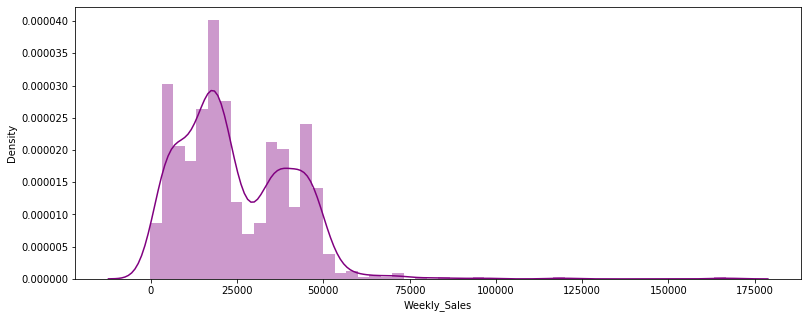

In [20]:
# Let's check distribution of dependent feature
plt.figure(figsize=(13,5))
sb.distplot(train_df['Weekly_Sales'],bins=50,color='purple')

- The dependent variable is positively skewed.

In [21]:
# Lets separate numerical data aside
df_numeric = train_df.select_dtypes(exclude = ["object","bool"])

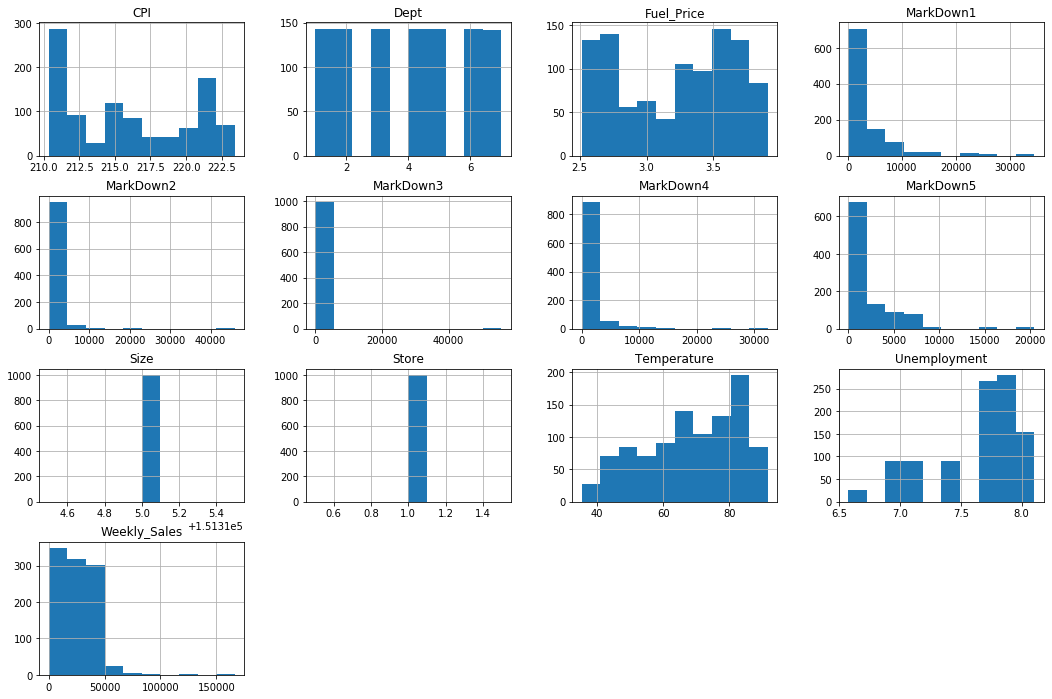

In [22]:
df_numeric.hist(figsize=(18,12))
plt.show()

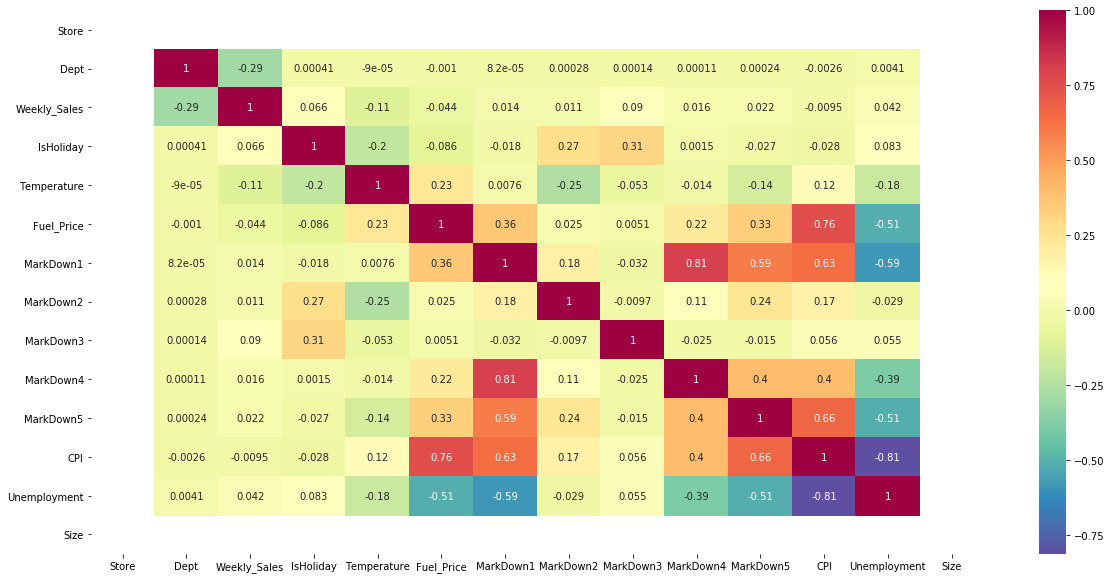

In [23]:
# Plot heatmap of correlation between features
plt.figure(figsize=(20, 10))
sb.heatmap(train_df.corr(),yticklabels=True,annot=True,cbar=True,cmap='Spectral_r')

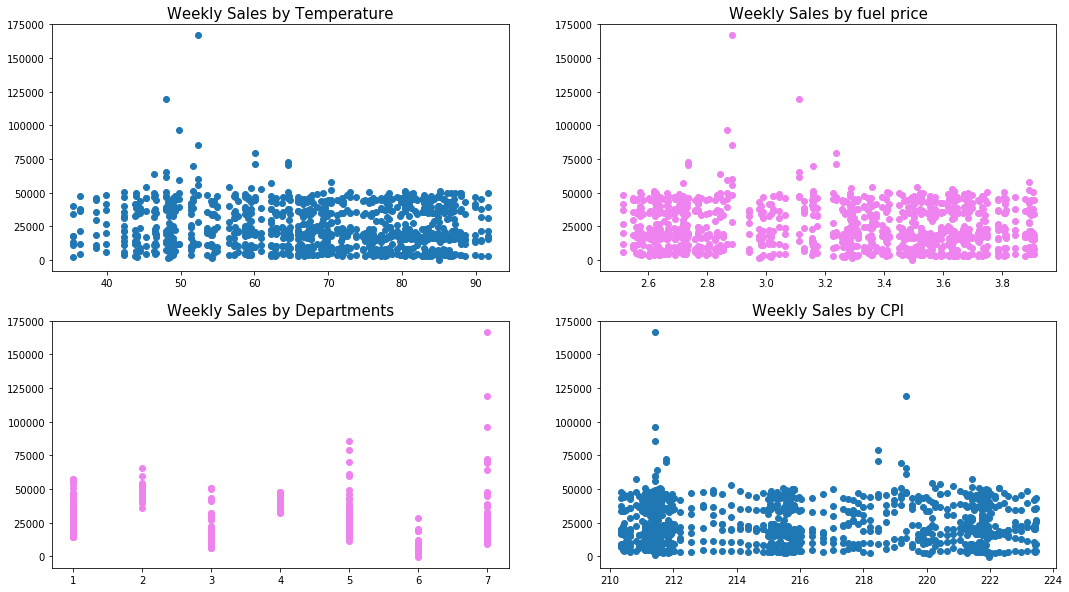

In [24]:
# visualising Sales by various features
fig, ax = plt.subplots(2, 2, figsize= (18,10))
ax[0,0].scatter(train_df['Temperature'], train_df['Weekly_Sales'])
ax[0,0].set_title('Weekly Sales by Temperature',fontsize=15)

ax[0,1].scatter(train_df['Fuel_Price'], train_df['Weekly_Sales'],color='violet')
ax[0,1].set_title('Weekly Sales by fuel price',fontsize=15)

ax[1,0].scatter(train_df['Dept'], train_df['Weekly_Sales'],color='violet')
ax[1,0].set_title('Weekly Sales by Departments',fontsize=15)

ax[1,1].scatter(train_df['CPI'], train_df['Weekly_Sales'])
ax[1,1].set_title('Weekly Sales by CPI',fontsize=15)
plt.show()

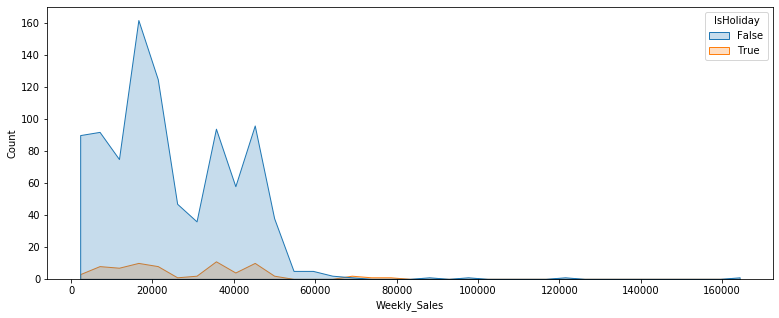

In [25]:
plt.figure(figsize=(13,5))
sb.histplot(train_df, x="Weekly_Sales", hue="IsHoliday", element="poly")

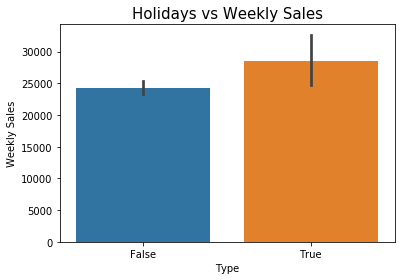

In [26]:
sb.barplot(x="IsHoliday", y="Weekly_Sales", data=train_df)
plt.title("Holidays vs Weekly Sales",fontsize=15)
plt.xlabel("Type")
plt.ylabel("Weekly Sales")
plt.show()


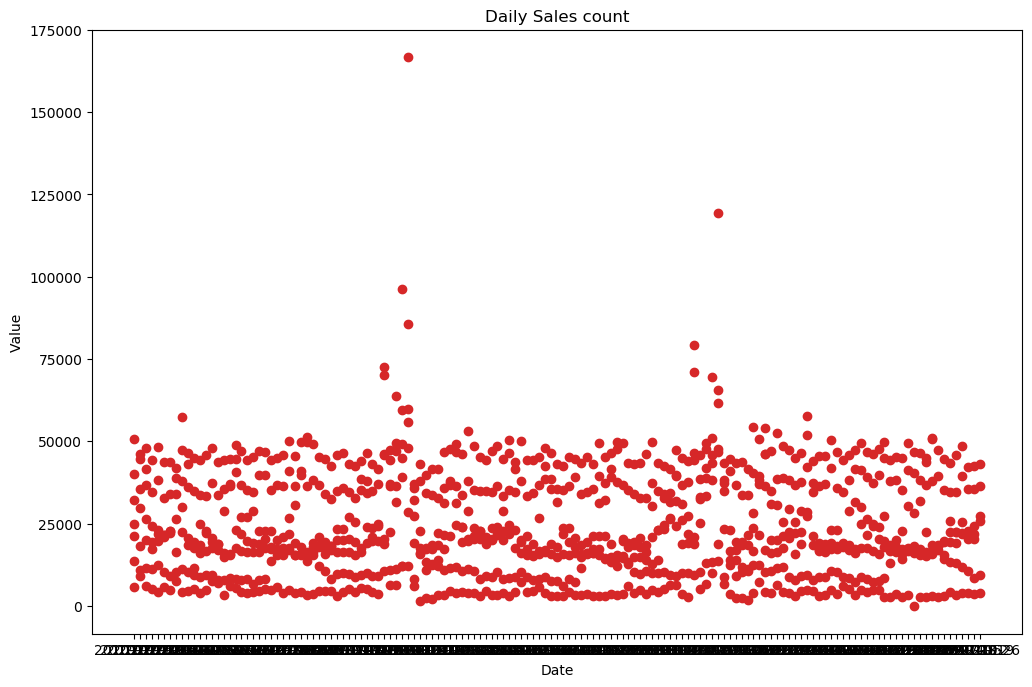

In [27]:
def plot_df(train_df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(12,8), dpi=dpi)
    plt.scatter(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(train_df, x=train_df.index, y=train_df['Weekly_Sales'], title='Daily Sales count')    

- The graph is very noisy and unable to read when plotted on daily basis. So lets plot the graph on monthly basis to check trends and seasonality

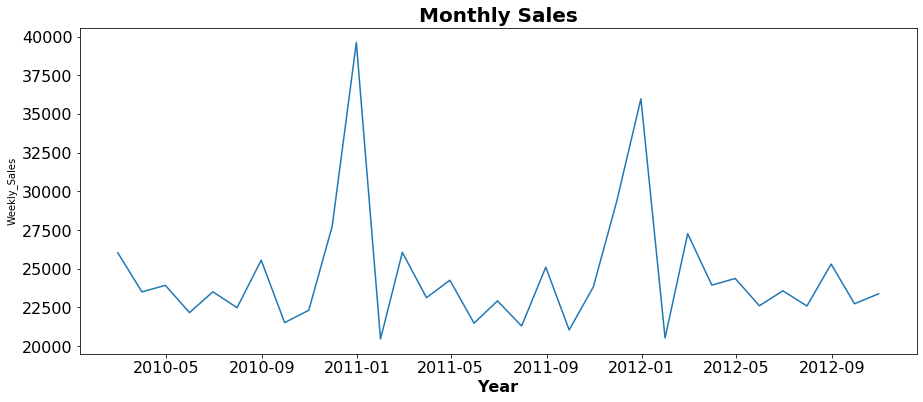

In [28]:
# Aggregating the Time Series to a monthly scaled index
y = tdf[['Date','Weekly_Sales']].copy()
y.set_index('Date', inplace=True)
y.index = pd.to_datetime(y.index)
y = y.resample('1M').mean()
y['Date'] = y.index

# Plot the Monthly Volume Lineplot
fig, ax = plt.subplots(figsize=(15, 6))
sb.lineplot(y['Date'], y['Weekly_Sales'])

ax.set_title('Monthly Sales', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)

- From the plot, We can see seasonal trend via Monthly Sales plotting.
- There is high spike in Sales in January month and it goes downward in February.
- Between months of May and September, Sales fulctuates on average rate.

## 5. Time Series Analysis

### --> Check stationarity of Time series 

In [29]:
from statsmodels.tsa.stattools import adfuller

In [30]:
# check for stationarity
def adf_test(series, title=''):
  
    print('Augmented Dickey-Fuller Test: {}'.format(title))
    # .dropna() handles differenced data
    result = adfuller(series,autolag='AIC') 
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out['critical value ({})'.format(key)]=val
        
    # .to_string() removes the line "dtype: float64"
    print(out.to_string())          
    
    if result[1] <= 0.05:
    
        print("Rejects the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary.")   

In [31]:
adf_test(train_df['Weekly_Sales'], title ='ADF TEST')

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic       -4.029054
p-value                   0.001266
# lags used               8.000000
# observations          991.000000
critical value (1%)      -3.436966
critical value (5%)      -2.864461
critical value (10%)     -2.568325
Rejects the null hypothesis
Data has no unit root and is stationary


- After running ADF Test, we can come to conclusion that our **data is Stationary**, so there's no need of conversion.

### --> Visualize the stationary data with Rolling mean & standard deviation

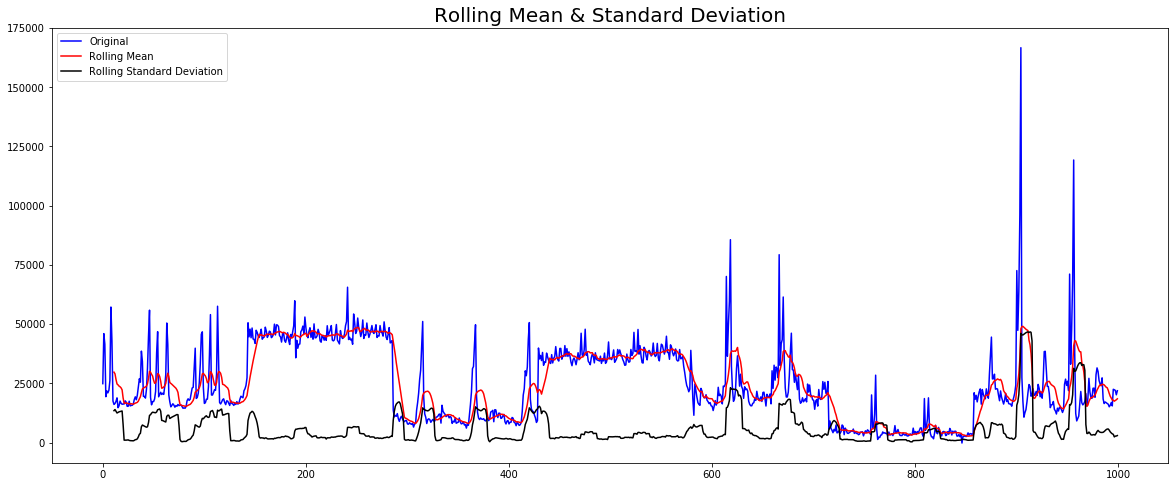

In [32]:
rolmean = tdf['Weekly_Sales'].rolling(12).mean()
rolstd = tdf['Weekly_Sales'].rolling(12).std()

#plot rolling statistics
plt.figure(figsize=(20,8))
orig = plt.plot(tdf['Weekly_Sales'],color='Blue',label='Original')
mean = plt.plot(rolmean,color='Red',label='Rolling Mean')
std = plt.plot(rolstd,color='Black',label='Rolling Standard Deviation')

plt.legend()
plt.title('Rolling Mean & Standard Deviation',fontsize=20)
plt.show()

### --> Autocorrelation & Partial Autocorrelation

[1.         0.83212    0.73723939 0.68103112 0.66974535 0.59395797
 0.58043769 0.58951982 0.58129722 0.5641419  0.54755816 0.53902708
 0.52823727 0.51435287 0.51250686 0.51951934 0.51076295 0.4975803
 0.48560313 0.47645855 0.46529952 0.45214599 0.4591584  0.46530768
 0.47384045 0.47378358 0.47226696 0.46482162 0.46164184 0.44896265
 0.43194553 0.40977906 0.39590174 0.3908733  0.3896287  0.38098663
 0.37623026 0.37974691 0.37094161 0.35783696 0.35234324 0.35273008
 0.35109601 0.35884961 0.36316384 0.36050864 0.34715468 0.32970253
 0.36694741 0.35687251 0.37644341 0.39769281 0.46632442 0.40159753
 0.35304622 0.32258281 0.3003966  0.25867004 0.24355484 0.24861906
 0.24282047]


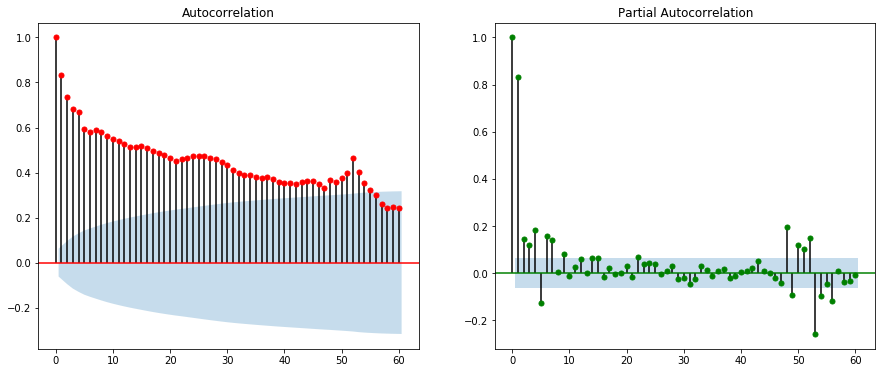

In [33]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(15, 6))
autocorr = acf(train_df['Weekly_Sales'], nlags=60, fft=False)
print(autocorr)

plot_acf(train_df['Weekly_Sales'].tolist(), lags=60, ax=ax[0], fft=False, color='Red');
plot_pacf(train_df['Weekly_Sales'].tolist(), lags=60, ax=ax[1], color='Green');

- Autocorrelation measures the linear relationship between lagged values of a time series.
- Partial autocorrelations measure the linear dependence of one variable after removing the effect of other variable that affect both variables.

### --> Lag Scatter plot

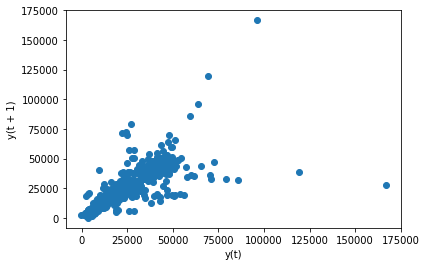

In [34]:
from pandas.plotting import lag_plot
lag_plot(train_df['Weekly_Sales'])

- We have positive Correlation in dependent feature.

### --> Differences in Time Series

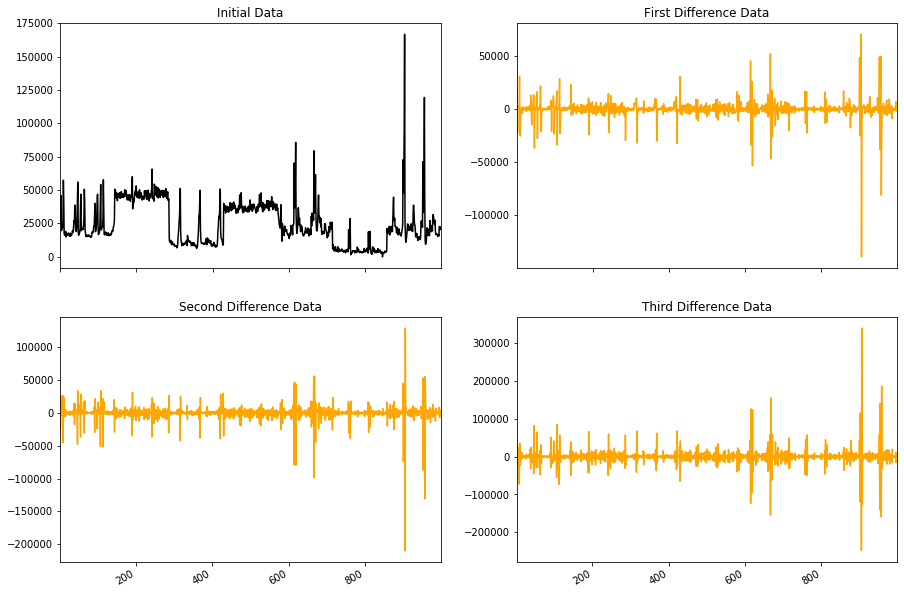

In [35]:
from statsmodels.tsa.statespace.tools import diff

fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(15, 11))
# Set the differences from the initial data
tdf['OpenDiff1'] = diff(tdf['Weekly_Sales'],k_diff=1)
tdf['OpenDiff2'] = diff(tdf['Weekly_Sales'],k_diff=2)
tdf['OpenDiff3'] = diff(tdf['Weekly_Sales'],k_diff=3)

# Plot the initial data and as well as Differences in initial data
tdf['Weekly_Sales'].plot(title="Initial Data",ax=ax[0][0], color='Black').autoscale(axis='x',tight=True);
tdf['OpenDiff1'].plot(title="First Difference Data",ax=ax[0][1],color='Orange').autoscale(axis='x',tight=True);
tdf['OpenDiff2'].plot(title="Second Difference Data",ax=ax[1][0],color='Orange').autoscale(axis='x',tight=True);
tdf['OpenDiff3'].plot(title="Third Difference Data",ax=ax[1][1],color='Orange').autoscale(axis='x',tight=True);

fig.autofmt_xdate()

### --> Time series Components

Text(0.5, 0.98, 'Open decomposition')

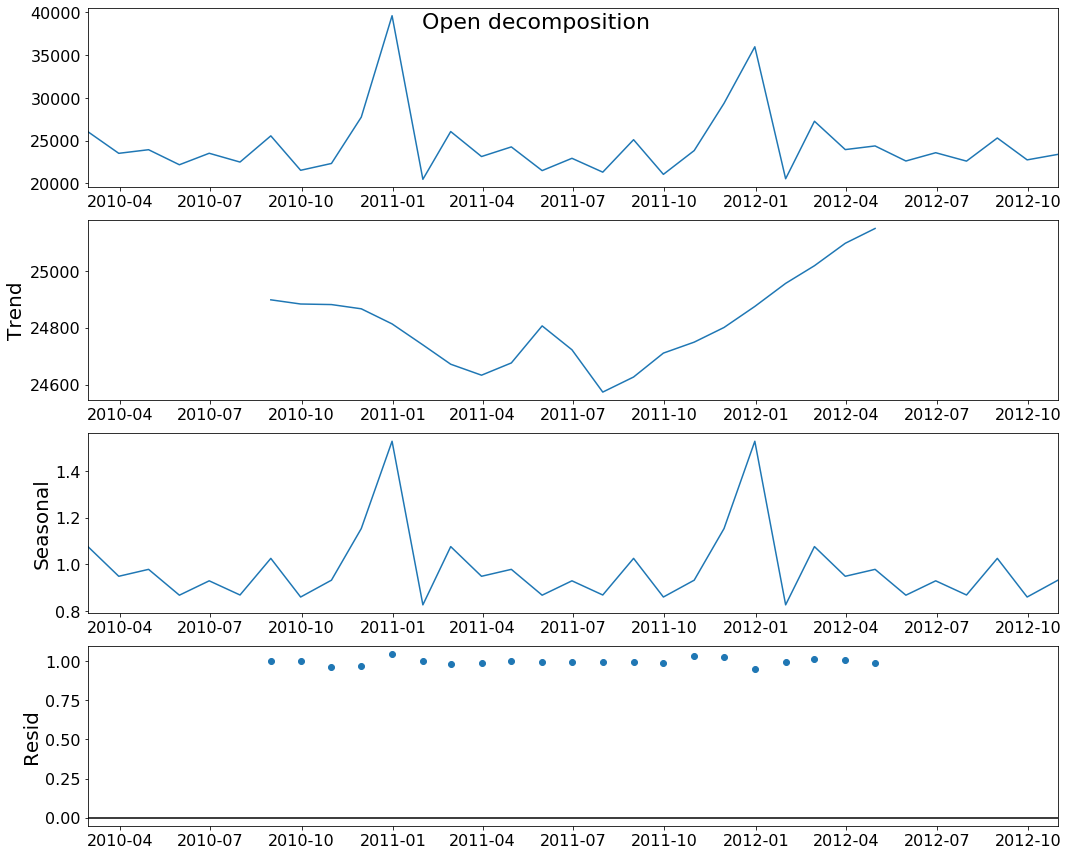

In [36]:
from pylab import rcParams
import statsmodels.api as sm

# Aggregating the Time Series to a monthly scaled index
y = tdf[['Date','Weekly_Sales']].copy()
y.set_index('Date', inplace=True)
y.index = pd.to_datetime(y.index)
y = y.resample('1M').mean()

# Setting rcparams
rcParams['figure.figsize'] = 15, 12
rcParams['axes.labelsize'] = 20
rcParams['ytick.labelsize'] = 16
rcParams['xtick.labelsize'] = 16

# DECOMPOSING TIME SERIES
decomposition = sm.tsa.seasonal_decompose(y, model='multiplicative', freq = 12)
decomp = decomposition.plot()
decomp.suptitle('Open decomposition', fontsize=22)

- We can see the increasing trend over the time in data.
- The seasonal component remains the same over time. But this doesn't mean years far apart won't have different seasonal patterns.
- The residual component displays what is left over when the seasonal and trend-cycle components have been subtracted from the data.

### --> Moving Average(MA)

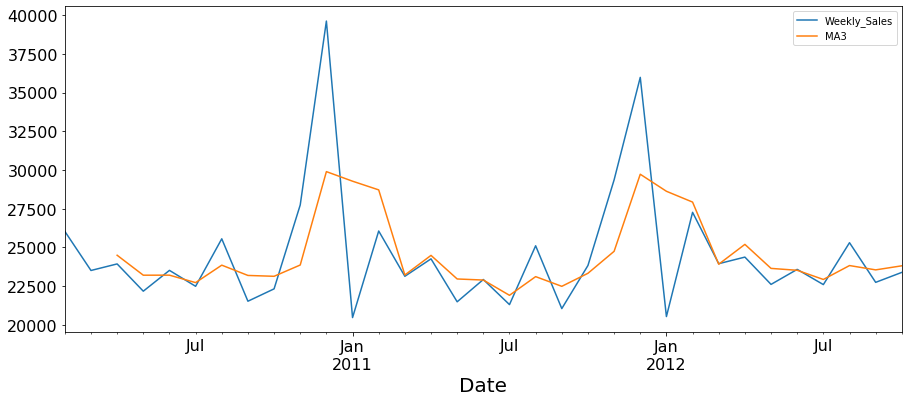

In [37]:
# Aggregating the Time Series to a monthly scaled index
y = tdf[['Date','Weekly_Sales']].copy()
y.set_index('Date', inplace=True)
y.index = pd.to_datetime(y.index)
y = y.resample('1M').mean()

y['MA3'] = y.rolling(window=3).mean() 
y.plot(figsize=(15,6));

- Moving average is the estimation of the trend-cycle at time , and is obtained by averaging the values of the time series within number of periods of time. 
- The Observations that are nearby in time are also likely to be close in value.

### --> Exponential Smoothing

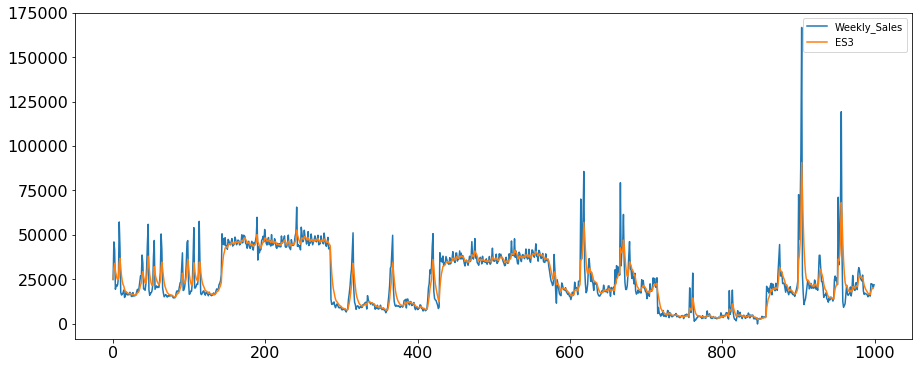

In [38]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
# Setting the span value
span = 6
# Weights of observations
alpha = 2/(span+1)

# Plot Simple exponential smoothing
tdf['ES3'] = SimpleExpSmoothing(tdf['Weekly_Sales']).fit(smoothing_level = alpha, optimized = False).fittedvalues.shift(-1)
tdf[['Weekly_Sales','ES3']].plot(figsize=(15,6));

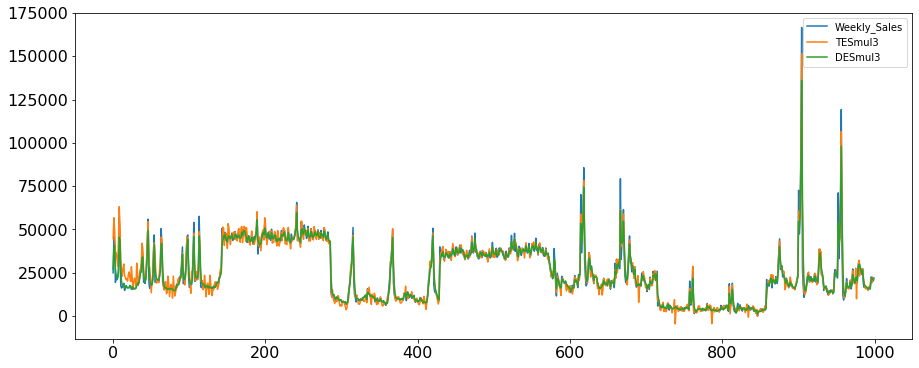

In [39]:
# Plot Double and Triple exponential smoothing
tdf['DESmul3'] = ExponentialSmoothing(tdf['Weekly_Sales'], trend = 'add').fit().fittedvalues.shift(-1)
tdf['TESmul3'] = ExponentialSmoothing(tdf['Weekly_Sales'], trend = 'add', seasonal = 'add', seasonal_periods = 24).fit().fittedvalues.shift(-1)
tdf[['Weekly_Sales', 'TESmul3', 'DESmul3']].plot(figsize = (15,6));

- Exponential smoothing assigns exponentially decreasing weights for newest to oldest observations.
- The weights decrease exponentially as the observations come from the past.
- The smallest weights are associated with oldest observations.

##  6. Time Series Forecasting

In [40]:
train_df = train_df.sort_values(by='Date')

In [41]:
train_df.shape

(1000, 15)

In [42]:
# Reset index column to put Date column back into Dataframe
train_df.reset_index(level=0, inplace=True)

In [43]:
#Creating train and test set 
train = train_df[0:700] 
test= train_df[700:]

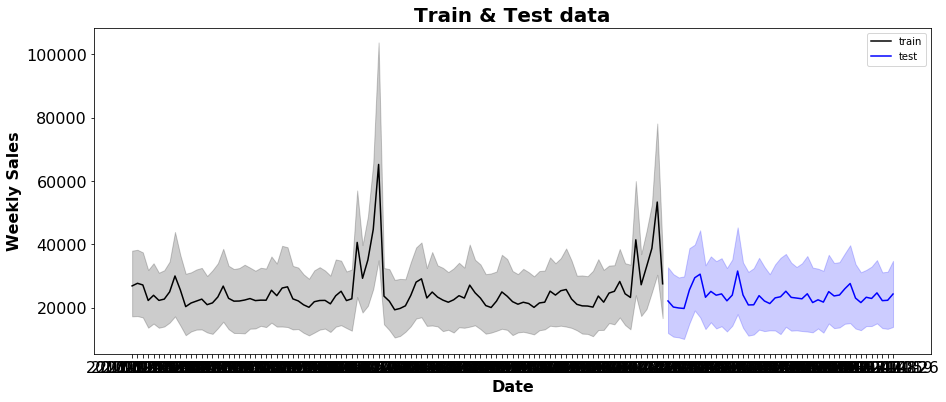

In [44]:
fig, ax = plt.subplots(figsize=(15, 6))
sb.lineplot(train['Date'], train['Weekly_Sales'], color = 'black')
sb.lineplot(test['Date'], test['Weekly_Sales'], color = 'blue')

# Formatting
ax.set_title('Train & Test data', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Date', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Weekly Sales', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)
plt.legend(loc='upper right' ,labels = ('train', 'test'))

> ## i) Naive's Approach

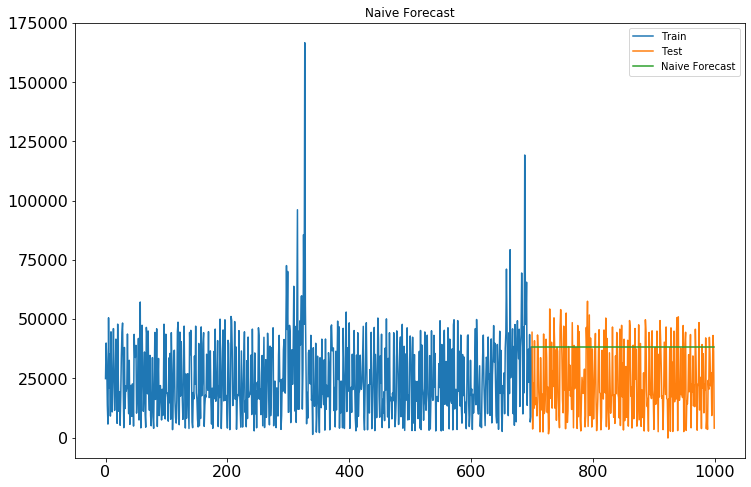

In [45]:
dd= np.asarray(train.Weekly_Sales)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Weekly_Sales'], label='Train')
plt.plot(test.index,test['Weekly_Sales'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [46]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt
mae_i = sqrt(mean_absolute_error(test.Weekly_Sales, y_hat.naive))
print("MAE :",mae_i)
rmse_i = sqrt(mean_squared_error(test.Weekly_Sales, y_hat.naive))
print("RMSE :",rmse_i)


MAE : 132.6629359190677
RMSE : 20607.035599903684


> ## ii) Moving Average Model 

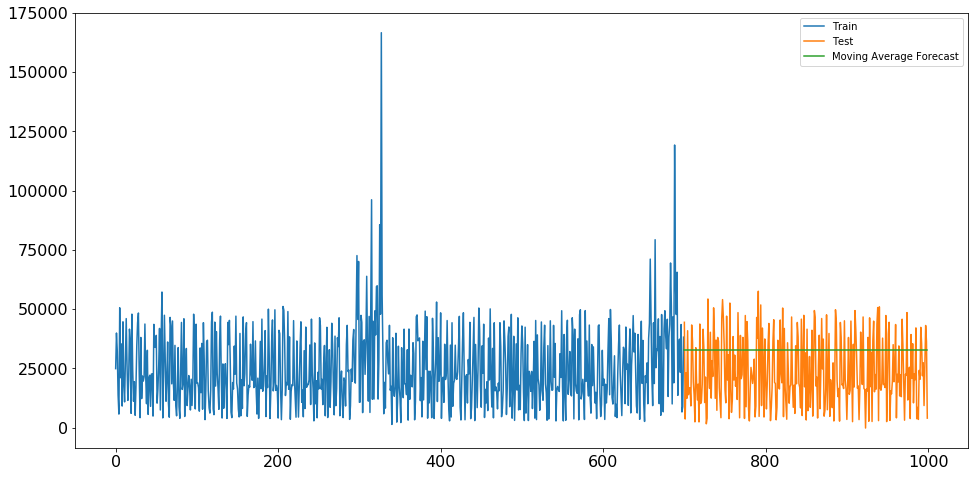

In [47]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['Weekly_Sales'].rolling(60).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train['Weekly_Sales'], label='Train')
plt.plot(test['Weekly_Sales'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [48]:
mae_ii = sqrt(mean_absolute_error(test.Weekly_Sales, y_hat_avg.moving_avg_forecast))
print("MAE :",mae_ii)
rmse_ii = sqrt(mean_squared_error(test.Weekly_Sales, y_hat_avg.moving_avg_forecast))
print("RMSE is:",rmse_ii)

MAE : 123.13537019611113
RMSE is: 17164.03936989321


> ## iii) Holt's Linear Trend Model

In [49]:
import statsmodels.api as sm
from   statsmodels.tsa.holtwinters import  Holt
y_hat_avg = test.copy()
model_fit = Holt(np.asarray(train['Weekly_Sales'])).fit()
y_hat_avg['Holt_linear'] = model_fit.forecast(len(test))

In [50]:
print('')
print('==Holt model Exponential Smoothing Parameters ==')
print('')
alpha_value = np.round(model_fit.params['smoothing_level'], 4)
beta_value  = np.round(model_fit.params['smoothing_slope'], 4)

print('Smoothing Level', alpha_value )
print('Smoothing Slope', beta_value)
print('Initial Level',   np.round(model_fit.params['initial_level'], 4))
print('')


==Holt model Exponential Smoothing Parameters ==

Smoothing Level 0.0656
Smoothing Slope 0.0
Initial Level 59.7787



In [51]:
Pred_Holt = test.copy()

Pred_Holt['Opt'] = model_fit.forecast(len(test['Weekly_Sales']))

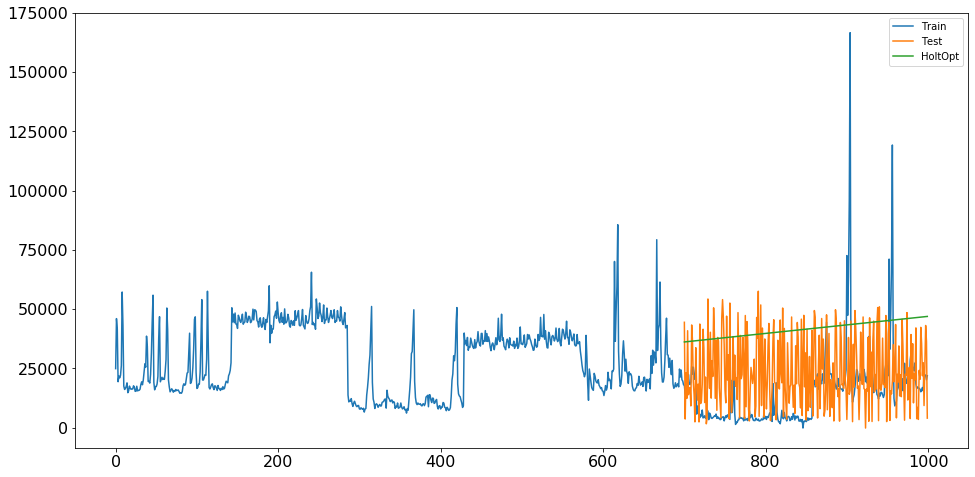

In [52]:
plt.figure(figsize=(16,8))
plt.plot(tdf['Weekly_Sales'], label='Train')
plt.plot(test['Weekly_Sales'], label='Test')
plt.plot(Pred_Holt['Opt'], label='HoltOpt')
plt.legend(loc='best')
plt.show()

In [53]:
df_pred_opt =  pd.DataFrame({'Y_hat':Pred_Holt['Opt'] ,'Y':test['Weekly_Sales'].values})

mae_iii= mean_absolute_error(df_pred_opt.Y, df_pred_opt.Y_hat)
print("MAE is ",mae_iii)
rmse_iii= sqrt(mean_squared_error(df_pred_opt.Y, df_pred_opt.Y_hat))
print("RMSE is ",rmse_iii)

MAE is  19863.623766925455
RMSE is  23319.049388406358


> ## iv) Holt's Winter's Model

In [54]:
y_hat_avg = test.copy()
fit_model = ExponentialSmoothing(np.asarray(train_df['Weekly_Sales']),seasonal_periods=20,trend='add',seasonal='add').fit()
y_hat_avg['Holt winter']= fit_model.forecast(len(test))

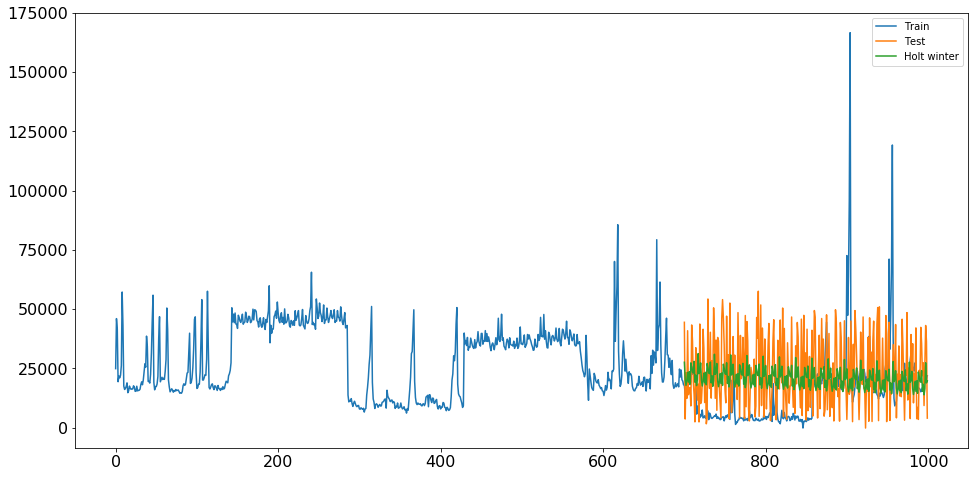

In [55]:
plt.figure(figsize=(16,8))
plt.plot(tdf['Weekly_Sales'],label='Train')
plt.plot(test['Weekly_Sales'],label='Test')
plt.plot(y_hat_avg['Holt winter'],label='Holt winter')
plt.legend()
plt.show()

In [56]:
rmse= np.sqrt(mean_squared_error(test['Weekly_Sales'],y_hat_avg['Holt winter']))
from sklearn.metrics import mean_absolute_error
mae_iv= mean_absolute_error(test['Weekly_Sales'],y_hat_avg['Holt winter'])
print('MAE : ',mae_iv)
rmse_iv= sqrt(mean_squared_error(test['Weekly_Sales'],y_hat_avg['Holt winter']))
print('RMSE : ',rmse_iv)

MAE :  11637.951325627642
RMSE :  14490.698491657313


> ## v) ARIMA Model

- We need to plot AF & PCAF first.


In [57]:
train_log = np.log(train['Weekly_Sales'])
test_log = np.log(test['Weekly_Sales'])
train_log_diff = train_log - train_log.shift(1)
train_log = train_log.dropna()
test_log = test_log.dropna()

In [58]:
from statsmodels.tsa.stattools import acf,pacf
lag_acf = acf(train_log_diff.dropna(), nlags=10)
lag_pacf = pacf(train_log_diff.dropna(), nlags=10, method='ols')

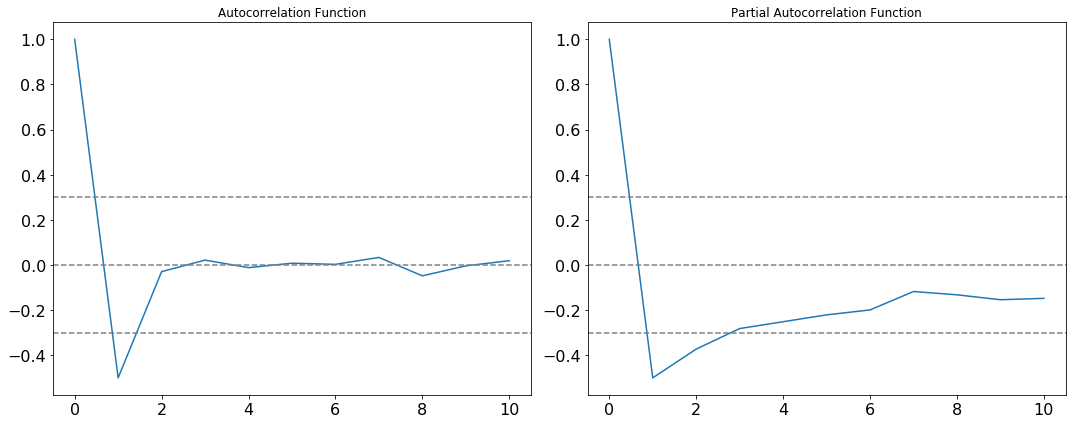

In [59]:
#Plot ACF & PACF : 
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-7.96/np.sqrt(len(train_log_diff)),linestyle='--',color='gray')
plt.axhline(y=7.96/np.sqrt(len(train_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(1,2,2)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-7.96/np.sqrt(len(train_log_diff)),linestyle='--',color='gray')
plt.axhline(y=7.96/np.sqrt(len(train_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

- Using the plot we can determine the values for p and q respectively :

    - p: the lag value where the PACF cuts off (drop to 0) for the first time. So here p = 1.
    - q: the lag value where the ACF chart crosses the upper confidence interval for the first time.so, q=1.

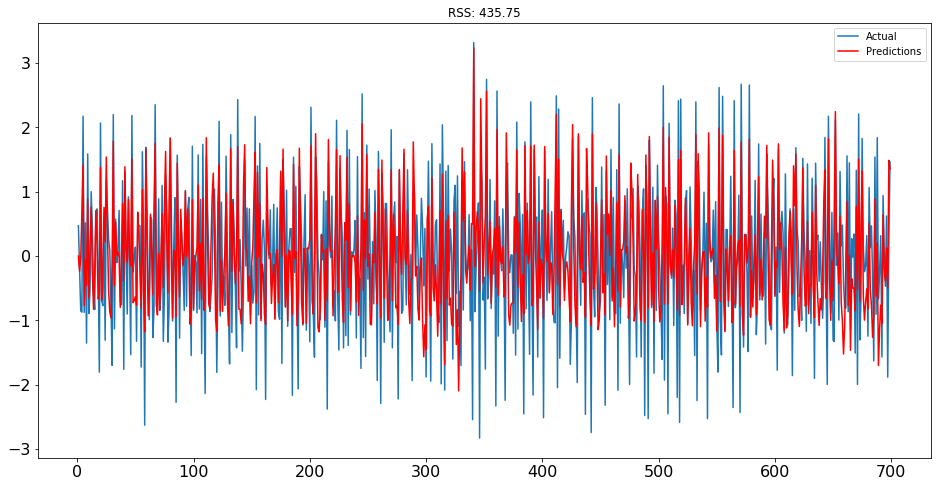

In [60]:
# Optimal values fot ARIMA(p,d,q) model are (1,1,1). Hence plot the ARIMA model using the value (1,1,1)
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_log, order=(2, 1, 1))  
results_ARIMA = model.fit(disp=-20,start_ar_lags= 40) 
plt.figure(figsize=(16,8))
plt.plot(train_log_diff.dropna(),label='Actual')
plt.plot(results_ARIMA.fittedvalues, color='red',label='Predictions')
plt.legend(loc='upper right')
sum = ((results_ARIMA.fittedvalues-train_log_diff)**2).sum()
plt.title('RSS: %.2f'% sum)
plt.show()


In [61]:
fc, se, conf = results_ARIMA.forecast(300, alpha=0.05)
fc.shape

(300,)

In [62]:
# Report performance
mae_v = mean_absolute_error(test['Weekly_Sales'], fc)
print('MAE: ',mae_v)
rmse_v = np.sqrt(mean_squared_error(test['Weekly_Sales'], fc))
print('RMSE: ',rmse_v)

MAE:  23660.231036584693
RMSE:  27799.400136885663


## 7. Model Evaluation

### Comparing all the models:

- Here, we are choosing **Mean Absolute Error** as main for evaluation.

In [63]:
models = pd.DataFrame({
    'Model': [ 'Naive Approch', 'Moving Average', "Holt's Linear trend",
               "Holt Winter's Model","ARIMA"],
    'MAE': [
        mae_i, 
        mae_ii,  
        mae_iii, 
        mae_iv,
        mae_v],
    'RMSE' : [
        rmse_i, 
        rmse_ii,  
        rmse_iii, 
        rmse_iv,
        rmse_v    
    ]

       })
print("--------TIME FORECASTING MODELS---------")
models.sort_values(by='MAE', ascending=True)

--------TIME FORECASTING MODELS---------


,Model,MAE,RMSE
1,Moving Average,123.135370,17164.039370
0,Naive Approch,132.662936,20607.035600
3,Holt Winter's Model,11637.951326,14490.698492
2,Holt's Linear trend,19863.623767,23319.049388
4,ARIMA,23660.231037,27799.400137


## Conclusion:
- For this particular dataset, **Moving Average model** is best suited for Forecasting.